# Build Graph from `.shp` File

Veitur have supplied shape files for the district metered area (DMA) of Álftanes

`./graph_data/alftanes_shp/Export_Output.shp`

We shall now see if this data can be turned into a graph using the `networkx` module and `Fiona`as is suggested on [GIS Stack Exhange](https://gis.stackexchange.com/questions/239633/how-to-convert-a-shapefile-into-a-graph-in-which-use-dijkstra)

This is the suggested way of installing `PyTorch Geometric` in a `Colab` notebook, as per their [Inventory of Colab Example Notebooks](https://pytorch-geometric.readthedocs.io/en/latest/notes/colabs.html)!

In [1]:
# Install required packages.
%pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
%pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
%pip install -q torch-geometric

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Import some generic modules we'll  be using

In [2]:
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

Here, we generate a function for visualisation of the graphs we're about to create

In [4]:
from torch_geometric.data import Data

In [5]:
%pip install shapely
%pip install fiona

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
spy

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (2, 3).

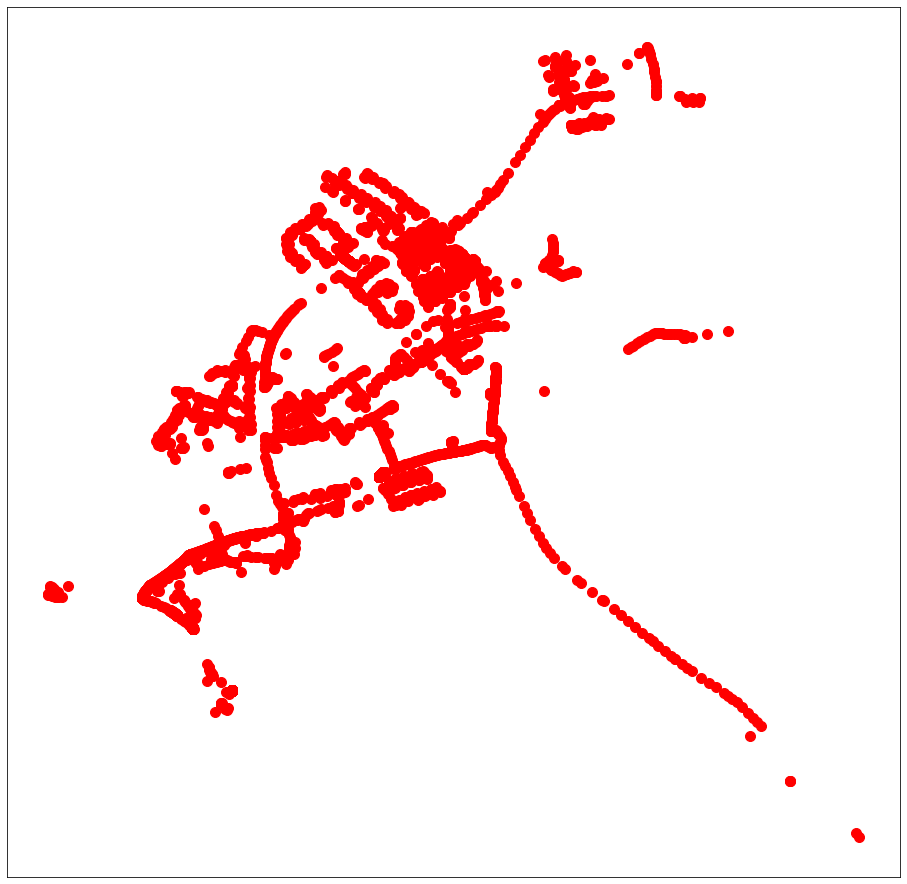

In [10]:
#G=nx.read_shp("./graph_data/alftanes_shp/Export_Output.shp", simplify=True, geom_attrs=True, strict=True) 
plt.figure(figsize=(16,16))
pos = {k: v for k,v in enumerate(G.nodes())}
X=nx.Graph() #Empty graph
X.add_nodes_from(pos.keys()) #Add nodes preserving coordinates
l=[set(x) for x in G.edges()] #To speed things up in case of large objects
edg=[tuple(k for k,v in pos.items() if v in sl) for sl in l] #Map the G.edges start and endpoints onto pos
nx.draw_networkx_nodes(X,pos,node_size=100,node_color='r')
X.add_edges_from(edg)
nx.draw_networkx_edges(X,pos)

In [7]:
from torch_geometric.utils import from_networkx

data = from_networkx(G)

In [8]:
%conda install GDAL

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.5
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


Convert -> https://github.com/caesar0301/s2g

In [9]:
%pip install s2g==0.2.6

  Using cached progressbar2-3.53.1-py2.py3-none-any.whl (25 kB)
Note: you may need to restart the kernel to use updated packages.


**IMPORTANT NOTICE!** 

For the `s2g` module to work, you must `pip uninstall progressbar2`, which is installed with `pip install s2g`, and instead install `pip install progressbar33`. Note that `s2g` is likely an old library and that the default `progressbar` at that time might have changed since (you know what I mean).

In [1]:
from s2g import ShapeGraph

/opt/anaconda3/envs/GraphBasedLearning/lib/python3.8/site-packages/s2g/bonus.py:23: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif u.geom_type is 'MultiLineString':


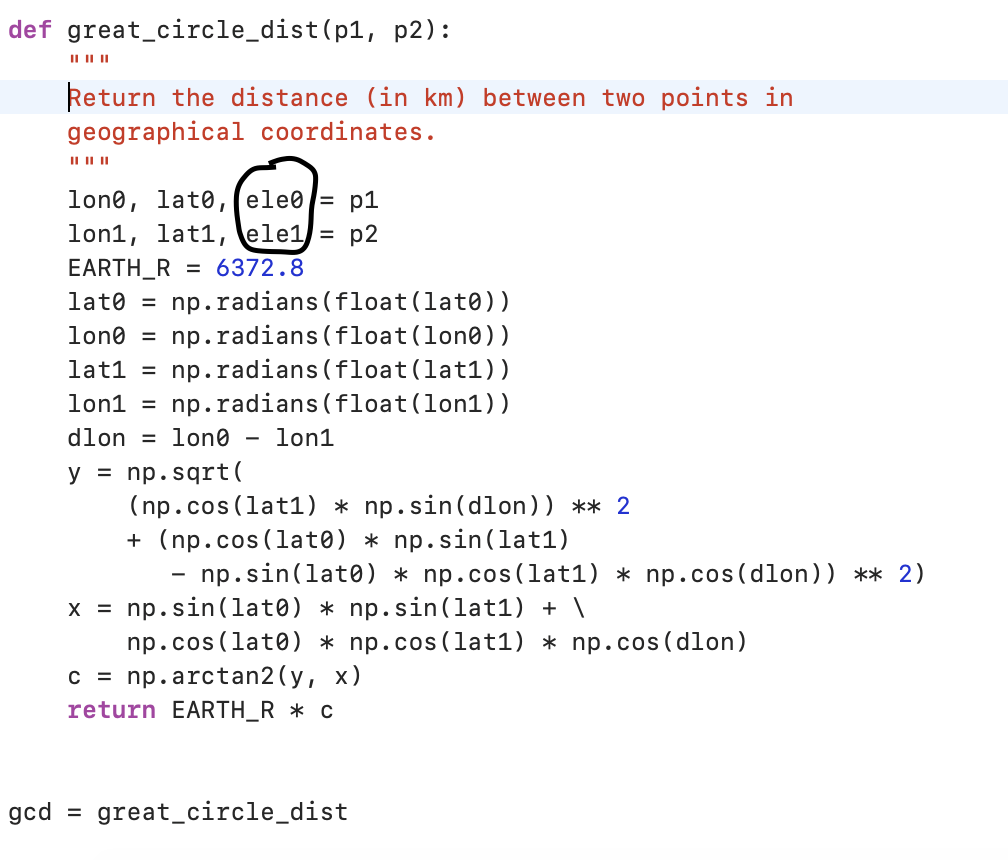

Screen Shot 2021-05-18 at 17.50.44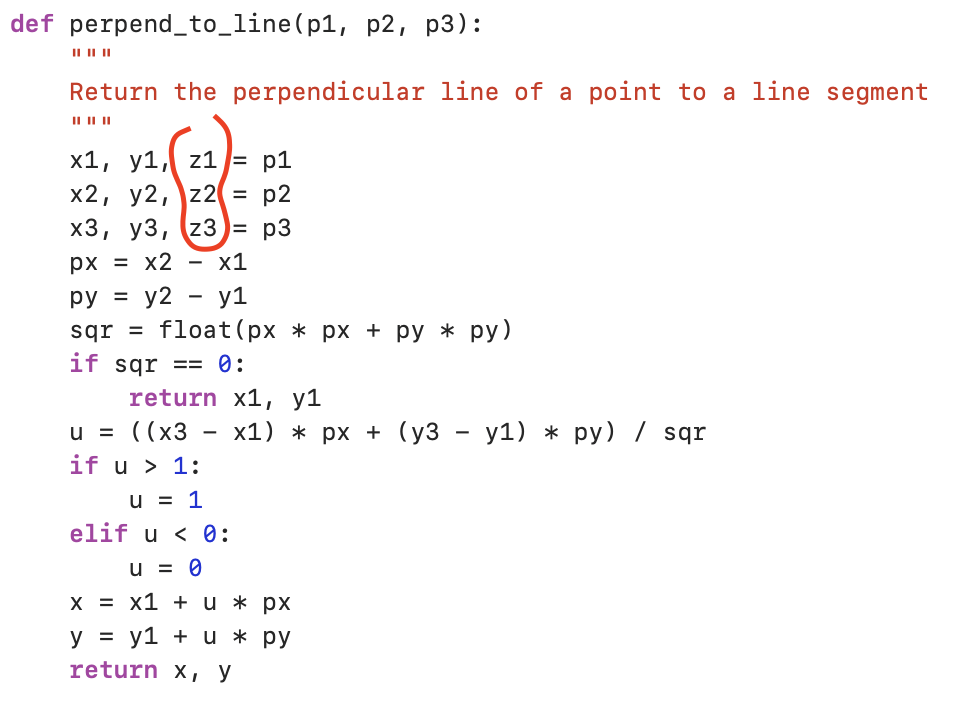

In [2]:
from s2g import ShapeGraph
import networkx as nx

sg = ShapeGraph(shapefile="./graph_data/alftanes_shp/Export_Output.shp", to_graph=True)
assert isinstance(sg.graph, nx.Graph)

ERROR:fiona._env:PROJ: proj_identify: Cannot find proj.db
INFO:root:Validating pair-wise line connections of raw shapefiles (total 1710 lines)
100% (1461195 of 1461195) |##############| Elapsed Time: 0:08:28 Time:  0:08:28
INFO:root:Processing the largest component with 1542 lines
INFO:root:Cutting lines with specific resolution = 1.0 km
 50% (781 of 1542) |##########           | Elapsed Time: 0:00:00 ETA:   0:00:00

Major components statistics:
	Total components: 21
	Component size: max 1542, median 3.0, min 2, average 80.71428571428571
	Top comp. sizes: 1542 55 22 20 14 6 4 3 3 3


100% (1542 of 1542) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
INFO:root:Adding pseudo edges to eliminate gaps between edges
INFO:root:Graph created with 6655 nodes, 6639 edges


In [23]:
G = sg.to_networkx()
data = from_networkx(G)

INFO:root:Processing the largest component with 1542 lines
INFO:root:Cutting lines with specific resolution = 1.0 km
100% (1542 of 1542) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
INFO:root:Adding pseudo edges to eliminate gaps between edges
INFO:root:Graph created with 6655 nodes, 6639 edges


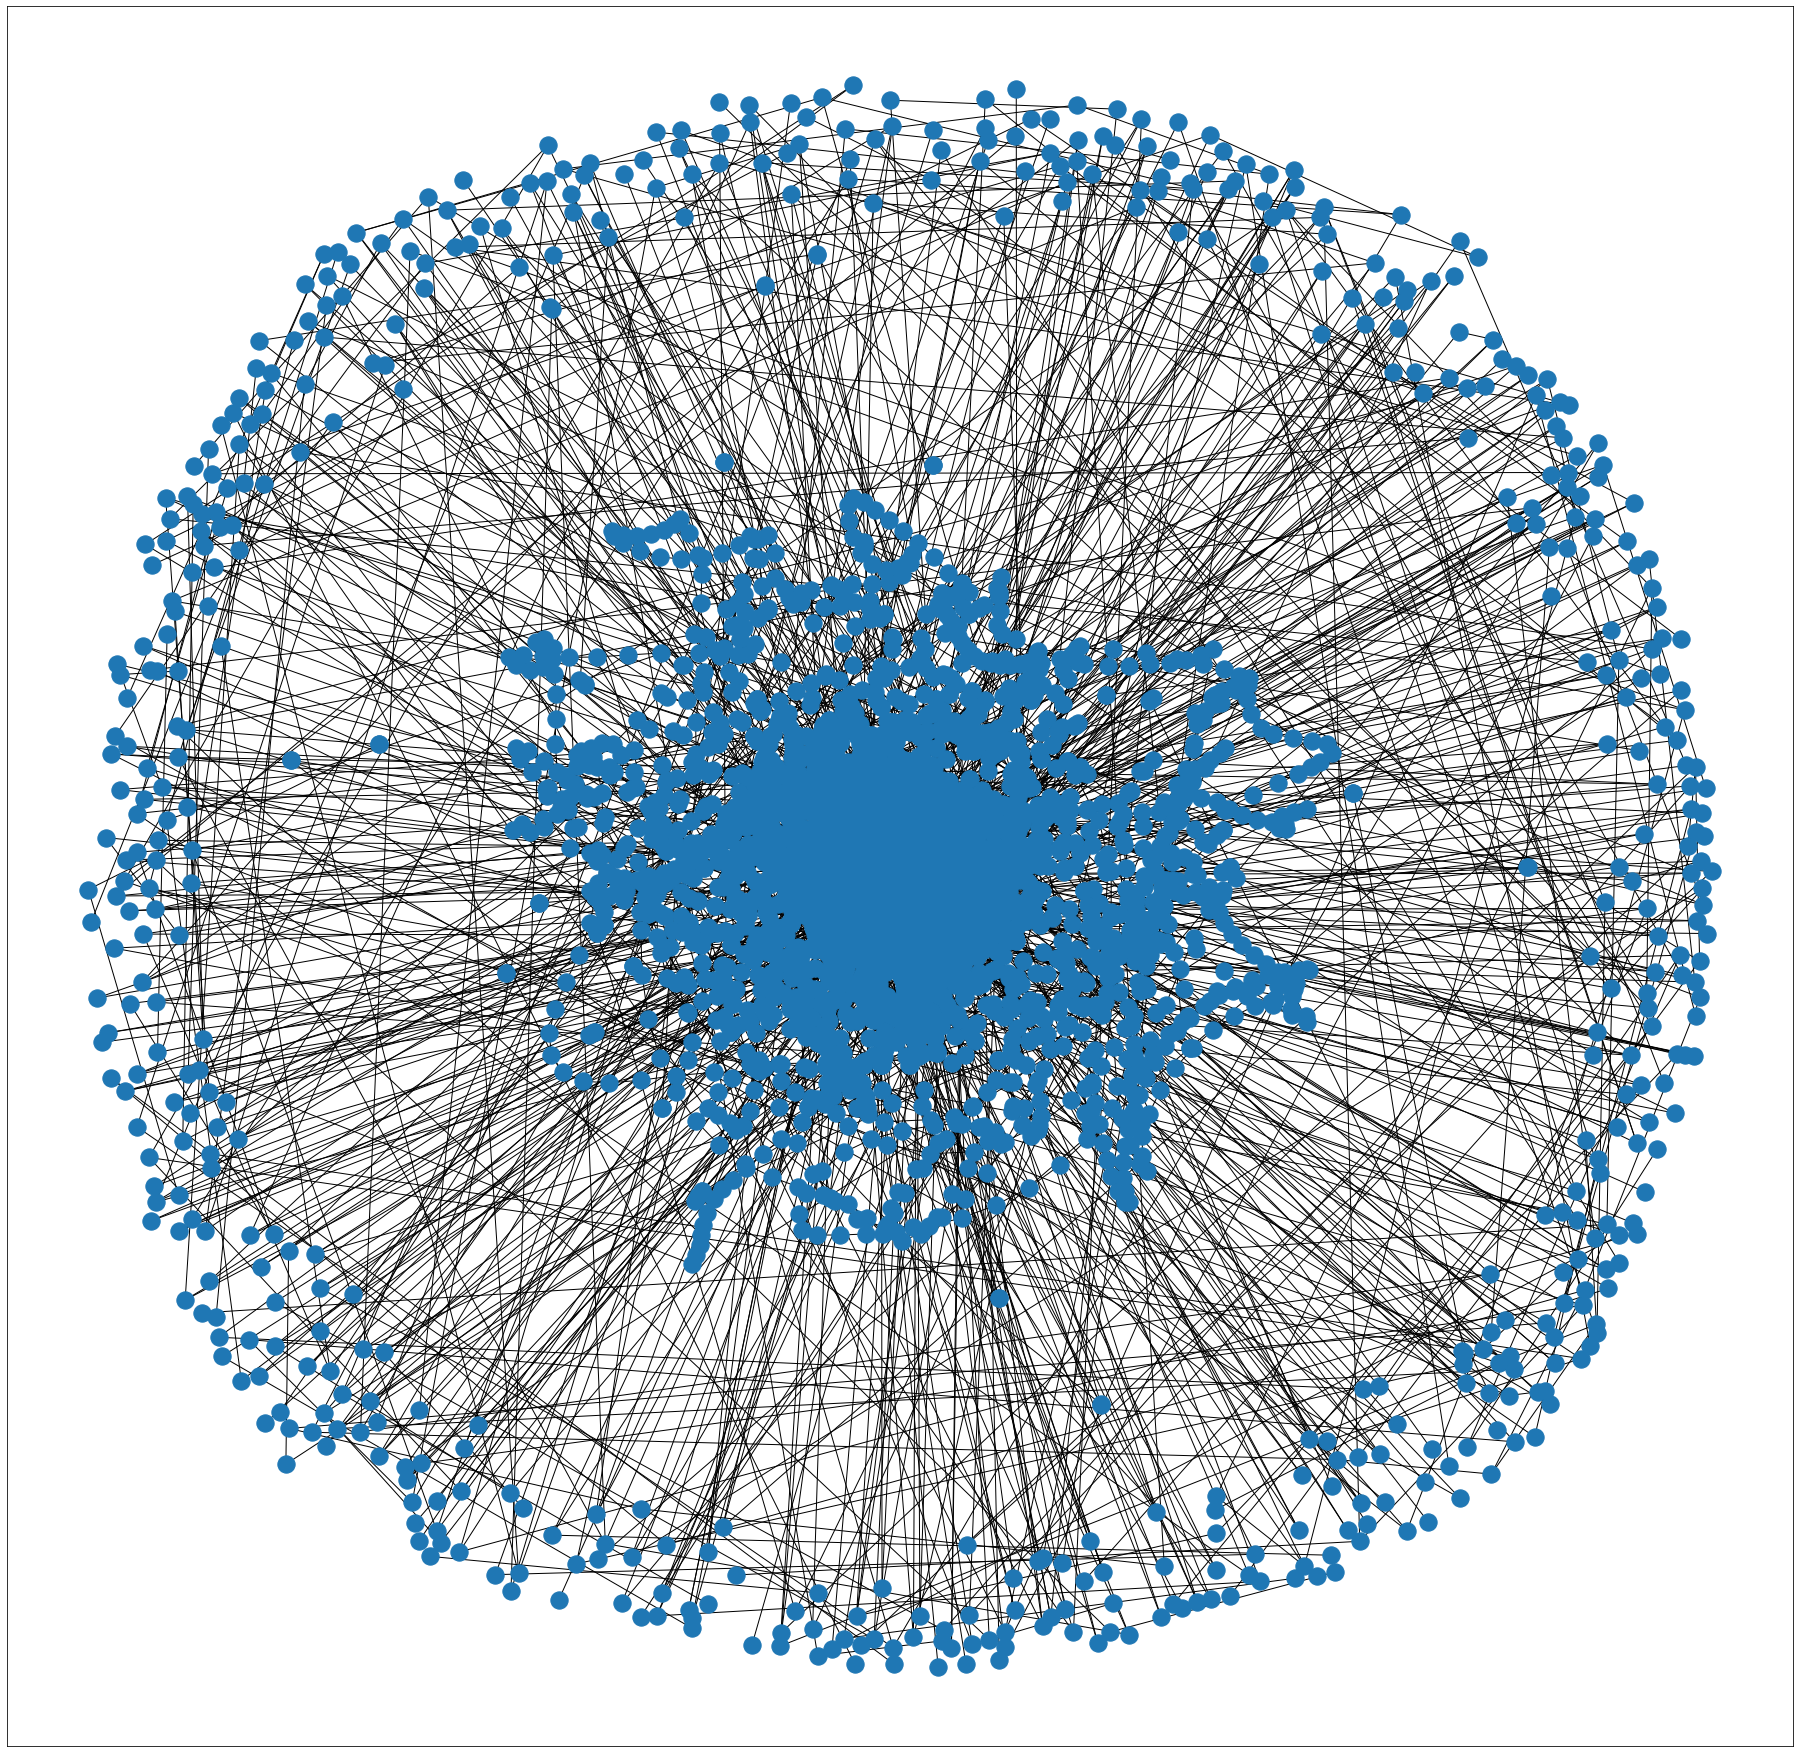

In [14]:
visualize(G, color = data.y)

In [30]:
for node in G.nodes():
    print(node.pos())

AttributeError: 'int' object has no attribute 'pos'